# Scraping

Let's demonstrate scraping thanks to [IMDb Top 250](https://www.imdb.com/search/title?groups=top_250&sort=user_rating)

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib

First step: get the HTML from the website

In [3]:
url = "https://www.imdb.com/search/title?groups=top_250&sort=user_rating"
response = requests.get(url)
html = response.content

Pass the HTML to `BeautifulSoup` for scraping:

In [5]:
soup = BeautifulSoup(html, "html.parser")

## Scraping _one_ movie

In [8]:
movies = soup.find_all("div", class_="lister-item-content")

In [12]:
first_movie = movies[0]

First, let's extract the movie title from `first_movie`:

In [17]:
movie_title = first_movie.find("h3").find("a").string
movie_title

'The Shawshank Redemption'

Let's do the same for year:

In [29]:
movie_year = int(first_movie.find("span", class_="lister-item-year").string.strip("()"))
movie_year

1994

In [34]:
movie_duration = int(first_movie.find("span", class_="runtime").string.strip(' min'))
movie_duration

142

## Scrape _all_ movies

First we need to define a container to hold information scraped from all movies

In [65]:
movies_dict = {
    "Title": [],
    "Year": [],
    "Duration": []
}

for movie in movies:
    movie_title = movie.find("h3").find("a").string
    movie_year = int(movie.find("span", class_="lister-item-year").string.strip("()"))
    movie_duration = int(movie.find("span", class_="runtime").string.strip(' min'))
    movies_dict["Title"].append(movie_title)
    movies_dict["Year"].append(movie_year)
    movies_dict["Duration"].append(movie_duration)

In [46]:
len(movies_dict["Duration"])

50

## Put the data in Pandas

In [66]:
movies_df = pd.DataFrame.from_dict(movies_dict)

In [67]:
movies_df.head()

,Title,Year,Duration
0,The Shawshank Redemption,1994,142
1,The Godfather,1972,175
2,The Dark Knight,2008,152
3,The Godfather: Part II,1974,202
4,The Lord of the Rings: The Return of the King,2003,201


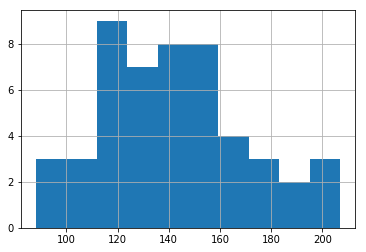

In [54]:
movies_df["Duration"].hist()

Let's see movies above 3 hours thanks to **boolean indexing**

In [58]:
movies_df[movies_df["Duration"] >= 60 * 3]

,Title,Year,Duration
3,The Godfather: Part II,1974,202
4,The Lord of the Rings: The Return of the King,2003,201
6,Schindler's List,1993,195
18,Shichinin no samurai,1954,207
23,The Green Mile,1999,189
